## INFS 770 - Assignment 5

**Note**: Created using Anaconda Python 3.7.3 (64-bit)

---

### Pre-task setup

In [1]:
# Imports
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx
import community
from pprint import pprint
from matplotlib import pyplot as plt

### Load Enron datafile

In [2]:
# Q1.1: Load data
file_name = "Email-Enron.txt"

# read an edge list into a networkx graph
g = nx.read_edgelist(file_name, # file location
                     comments="#", # the character used to indicate the start of a comment
                     delimiter="\t", # the character that separates values in a line
                     create_using=nx.Graph() # create as undirected graph
                    )


### Q1: Nodes & Edges

In [3]:
# print the number of nodes and the number of edges in the entire network 
pprint(nx.info(g))

('Name: \n'
 'Type: Graph\n'
 'Number of nodes: 36692\n'
 'Number of edges: 183831\n'
 'Average degree:  10.0202')


In [4]:
# print the density of the network
print(nx.density(g))

0.00027309755503535


### Q2: Explain network concepts

**1) What do the nodes and edges mean in this network?**

**A:**  The nodes in this network represent the individual email addresses in the Enron email dataset.  The edges represent a connection between the two email addresses, in other words if those email addresses exchange at least one email then they'll have an edge.

**2) Are the edges weighted? If so, what does the weight mean?**

**A:** No, the edges are not weighted.  Each edge represents one email that was sent between the two nodes.

**3) What does density of network mean?**

**A:** The density represents what proportion of the total actual connections there are as compared to the total possible connections that there could be in a network.  For this dataset, if every email address exchanged an email with every other address in the dataset, then that would be the maximum possible density.  

We can see from the density measure above that the network density is much, much lower, meaning that most of the email addresses in the dataset have probably only sent emails with a few (if any) other email addresses.  There are likely very few addresses that have sent emails with high quantities of other email addresses in the dataset.

### Q3: Histogram

In [5]:
# compute node degrees of a graph
degree = nx.degree(g)
##pprint(degree)
# convert it to pandas dataframe
df_degree = pd.DataFrame([x for x in degree], columns=["node", "degree"])
# sort nodes by degree in descending order
df_degree = df_degree.sort_values("degree", ascending=False)
##pprint(df_degree)

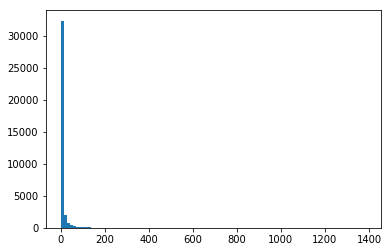

In [6]:
# plot the degree histogram
plt.hist([y for (x, y) in degree], bins=100);

**Q: Interpret the histogram (hint: you must talk about the distribution shown in the histogram)**

**A:** This histogram shows a power-law distribution, or as we also learned in class -- a heavy-tailed distribution.  This indicates that a very small number of nodes have a very high degree of connectedness to lots of other nodes.  As discussed in the previous question on network density, this makes sense, as the majority of addresses have sent few (if any) emails to other addresses in the dataset, and a much smaller number of email addresses would have sent emails to a higher quantity of other addresses in the set.  Those would be the more well-connected nodes.

### Q4: Examine network components & connections

In [7]:
# print the number of connected components in the network
components = list(nx.connected_component_subgraphs(g))
print("number of components: {}".format(len(components)))

number of components: 1065


In [8]:
# print the number of nodes and number of edges in the largest component
largest_nodes = len(max(nx.connected_components(g), key=len))
largest_edges = max(nx.connected_component_subgraphs(g), key=len).number_of_edges()

print("Number of nodes in largest component: {}".format(largest_nodes))
print("Number of edges in largest component: {}".format(largest_edges))

Number of nodes in largest component: 33696
Number of edges in largest component: 180811


### Q5: Naming and visualizing

In [9]:
# name the component having 16 nodes as comp_A 
# name the component having 14 nodes as comp_B
# (here you need to write a for loop to traverse the list of component and 
# set comp_A to be the component with number_of_nodes()==16 ) 
for item in components:
    if item.number_of_nodes()==16:
        comp_A = item
    elif item.number_of_nodes()==14:
        comp_B = item
    else:
        pass

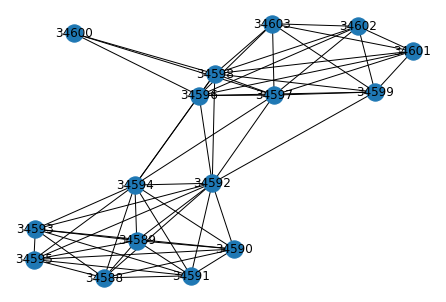

In [10]:
# visualize comp_A
nx.draw_spring(comp_A, with_labels=True)

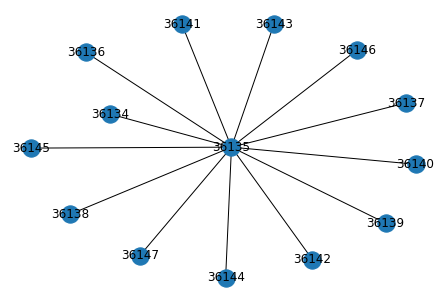

In [11]:
# visualize comp_B
nx.draw_spring(comp_B, with_labels=True)

### Q6: Comparing comp_A and comp_B

In [12]:
# Calculate density of comp_A
print("comp_A density: {0:.3f}".format(nx.density(comp_A)))

# Calculate density of comp_B
print("comp_B density: {0:.3f}".format(nx.density(comp_B)))

# Calculate average degree of comp_A
comp_A_avg_degree = sum(dict(comp_A.degree()).values())/float(comp_A.number_of_nodes())
print("comp_A avg degree: {0:.3f}".format(comp_A_avg_degree))

# Calculate average degree of comp_B
comp_B_avg_degree = sum(dict(comp_B.degree()).values())/float(comp_B.number_of_nodes())
print("comp_B avg degree: {0:.3f}".format(comp_B_avg_degree))

comp_A density: 0.492
comp_B density: 0.143
comp_A avg degree: 7.375
comp_B avg degree: 1.857


**Q: summarize the difference between comp_A and comp_B. You need to at least compare these two subgraphs with respect to average degree and density.**

A: comp_A has a higher density than comp_B, as the number of edges that comp_A contains is much closer to the maximum possible number of edges that it could contain as compared to comp_B.  The calculations immediately above validate that this is indeed the case.

comp_A also has a higher average degree than comp_B, as there are on average many more hops to get between nodes within the graph.  comp_B is structured as a star graph, so at most there are only two hops between any two nodes, giving it a much lower average degree than comp_A.  The calculations immediately above also validate that this is the case for the average degree.

### Q7: Determine communities

In [13]:
# use the Louvain modularity method to detect communities within Component A with 16 nodes
import community
partition = community.best_partition(comp_A)

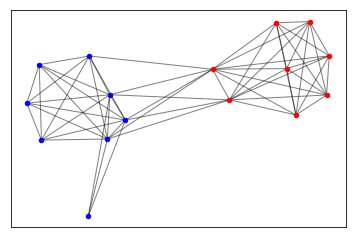

In [14]:
# visualize the different communities using different colors as I did in socialnet_example.ipynb

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(comp_A)
count = 0
colors = ["r", "b", "k", "y"]
for com in set(partition.values()) :  
    list_nodes = [nodes for nodes in partition.keys()if partition[nodes] == com]
    nx.draw_networkx_nodes(comp_A, pos, list_nodes, node_size = 20, node_color = colors[count])
    count += 1
nx.draw_networkx_edges(comp_A, pos, alpha=0.5)
plt.show()

In [15]:
# print the number of communities you discovered
values = [(node, partition.get(node)) for node in comp_A.nodes()]
#pprint(values)

community_num = []
for item in values:
    if item[1] not in community_num:
        community_num.append(item[1])

print("Number of communities: {}".format(len(community_num)))

Number of communities: 2


### Q8: Cliques

In [16]:
# print the number of cliques in comp_A
nx.graph_number_of_cliques(comp_A)

5

In [17]:
# look at the nodes in all of the cliques
for clique in nx.find_cliques(comp_A):
    pprint(clique)

['34601', '34602', '34597', '34598', '34603', '34599', '34596']
['34600', '34598', '34597', '34596']
['34592', '34599', '34598', '34597', '34596']
['34592', '34594', '34588', '34590', '34591', '34595', '34589', '34593']
['34592', '34594', '34598', '34597', '34596']


In [18]:
# show the nodes in the largest clique
from networkx.algorithms.approximation import clique
print("nodes in the largest clique:")
pprint(clique.max_clique(comp_A))

nodes in the largest clique:
{'34588', '34590', '34594', '34591', '34592', '34589', '34593', '34595'}


### Q9: Comparing node opinions

**Q: which two nodes (people) in comp_A are likely to have similar opinions and why?**

A: I think these two nodes are most likely to have similar opinions:
* 34592
* 34594

The reason that I think these two nodes would have similar opinions is because both of these nodes are in two distinct cliques together.  They're the only two that share that similarity.  

These are the two cliques that they share membership in:

[**'34592'**, **'34594'**, '34597', '34596', '34598']

[**'34592'**, **'34594'**, '34595', '34590', '34593', '34591', '34588', '34589']

**Q: Which two nodes in comp_A are likely to have different opinions and why?**

A: I think these two nodes are most likely to have different opinions:
* 34600
* 34602

Those two nodes do not share membership in any of the cliques, so based on that difference it seems that they would be most likely to be the most different from each other.

### Q10: Centrality and finding important nodes

In [19]:
# Find important nodes in comp_A using at least three centrality measures
# For each measure, please write code to print a datafame with two columns 
# “node” and centrality (e.g., betweenness_centrality or closeness_centrality) 
# and the dataframe needs to be sorted by the centrality measure in a descending order. 
# Pease note you just need to run the centrality computations for comp_A rather than the whole network.

# Measure 1: compute node betweenness of a graph
between = nx.betweenness_centrality(comp_A)
# convert it to pandas dataframe
df_between = pd.DataFrame(list(between.items()), columns=["node", "betweenness"])
# sort nodes by betweenness in descending order
df_between = df_between.sort_values("betweenness", ascending=False)
print(df_between)

     node  betweenness
8   34592     0.271769
4   34594     0.187755
7   34597     0.106122
14  34598     0.106122
15  34596     0.106122
12  34599     0.031633
0   34588     0.000000
1   34601     0.000000
2   34600     0.000000
3   34590     0.000000
5   34602     0.000000
6   34591     0.000000
9   34589     0.000000
10  34593     0.000000
11  34595     0.000000
13  34603     0.000000


In [20]:
# Measure 2: compute node closeness of a graph
closeness = nx.closeness_centrality(comp_A)

# convert it to pandas dataframe
df_closeness = pd.DataFrame(list(closeness.items()), columns=["node", "closeness"])

# sort nodes by closeness in descending order
df_closeness=df_closeness.sort_values("closeness", ascending=False)
print(df_closeness)

     node  closeness
8   34592   0.789474
4   34594   0.750000
7   34597   0.714286
14  34598   0.714286
15  34596   0.714286
12  34599   0.652174
0   34588   0.555556
3   34590   0.555556
6   34591   0.555556
9   34589   0.555556
10  34593   0.555556
11  34595   0.555556
1   34601   0.500000
5   34602   0.500000
13  34603   0.500000
2   34600   0.454545


In [21]:
# Measure 3: compute node PageRank centrality of a graph
pagerank = nx.pagerank_numpy(comp_A)

# convert it to pandas dataframe
df_pagerank = pd.DataFrame(list(pagerank.items()), columns=["node", "pagerank"])

# sort nodes by pagerank in descending order
df_pagerank=df_pagerank.sort_values("pagerank", ascending=False)
print(df_pagerank)

     node  pagerank
8   34592  0.087800
4   34594  0.080405
7   34597  0.076243
14  34598  0.076243
15  34596  0.076243
12  34599  0.060488
3   34590  0.058530
6   34591  0.058530
9   34589  0.058530
10  34593  0.058530
11  34595  0.058530
0   34588  0.058530
1   34601  0.053473
5   34602  0.053473
13  34603  0.053473
2   34600  0.030977


**Q: Summarize the results you obtained from the different centrality measures (you need to tell me if these different measures give similar results in identifying the most important people in the network; if not, why the results are different (here you cannot just say the results are different because I used different measures. You need to compare different measures and discuss their implications))**

A: All 3 measures give remarkably similar results, with the top five most important nodes consistently being this group of nodes:

1. 34592
2. 34594
3. 34598
4. 34597
5. 34596

The order of these top five was identical for node betweenness, node closeness, and node PageRank measures.

Measure 1 (betweenness) indicates how often a node shows up between other nodes on the shortest path between the nodes.  This measure gives us a sense of how much control or importance a node may have between other nodes.

Measure 2 (closeness) indicates how far a node is to other nodes in the graph, with higher values signifying that a node is less far (closer) to other nodes in the graph, and would therefore be more important with higher values.

Measure 3 (PageRank) indicates how often other nodes link back to a node.  I think of this measure as giving us a sense of how important other nodes think our node in question is, with higher values indicating higher importance.

Given that all three of these measures have results that agree on the top 5 nodes, I think we can safely conclude that the 5 nodes listed above are the most important ones in our graph.